# Clasificacion
En la regresion lineal tenemos un continuo de posibilidades $y$. Y los parametros $\theta$ tambien estan en un continuo de posibilidades. 

Sin embargo en la practica encontramos muchos problemas donde las etiquetas $y$ esten definidas en un discreto.

Veamos algunos ejemplos:

* Un paciente resulta "positivo" o "negativo" en un diagnostico de una enfermedad.

* La oficina postal debe reconcer entre los digitos $0,1, 2, \cdots 9$ para etiquter su correo.

* De una base de datos de fotos, queremos reconcer entre si hay una jirafa, o un elefante, o una persona, y mas aun el nombre de la persona.

* Necesitamos determinar si un email es spam o no (fraude, falso)

* Los clientes de una tarjeta de credito quieren saber si hay fraude en una trasaccion

* Un banco quiere saber si una persona tiene alto riesgo de no pagar un prestamo.

Hay muchos algoritmos en ML de clasificacion. Algunos son:

* Regresion logistica (es clase)
* SVM: Support Vector Machines (maquinas de soporte vectorial)
* Decision trees (arboles de decision) 
* Random Forests (bosques aleatorios). Estan las notas de clase pero no hay tiempo de incluirlos en el curriculo. Si quiere los podemos discutir por fuera.

* Naive Bayes : Tampoco lo vemos en clase . No esta en las notas

* Redes Neuronales: ANN: Artificial Neural Networks
* etc.


## Regresion logisitica (logistic regression)

La palabra logistica viende de que , inicialmente se queria predecir si algo es "si" o "no". O sea que las
etiquetas $y$ eran variables booleanas (logicas).
No siempre el numero de clases es 2, pueden haber 3 o mas clases. La variable $y$ en este caso tambien se conoce como *categorica*. Por ejemplo $y$ puede representar uno de tres animales: gato, perro, conejo. Mas adelante vemos como afrontar el problema de 3 o mas cagorias $K=3$.

Repasando un poco la regresion lineal nosotros definiamos una hipotesis:

$$ h(\Theta, X) = X \Theta $$ 
por el momento $h(\Theta)$. 

Entonces definiamos una funcon objetivo

$$ J(\Theta) = \frac12 \| h(\Theta) - Y \|^2 $$
Queremos hallar $\Theta$ tal que

$$ \min_{\Theta} J(\Theta) $$

Vamos a asumir dos estados par a $y$ (1,0 o si , no, falso y verdadero, blanco y negro)

Digamos que un paciente $q_i$ puede o no tener cancer. Esta una variable dichotomous (dicotomica).
Para ser honestos, este es un problema estadistico.

Vamos a ver el problema desde el punto de vista estadisco. Podemos formular nuestra primera ecuacion

$$ p( q_i \text{tenga cancer} | x_i, \Theta) \ge \text{umbral}  $$



El plan de ataque siempre es el mismo:

* Construir una hipotesis
* Construir la funcion de costo
* Hallar el gradiente de la funcion de costo
* Con el gradiente respolver el problema de optimizacion. 


$y=1$ tiene cancer
Si de forma ingenua pensamors de la siguiente forma

$$ p_{ingenua} = p_{ingenua}( y=1 | x, \theta_0, \theta_1) = \theta_0 + \theta_1 x $$



Pensemos en un termino que en ingles se llama "odds" y lo traduzco como el chance.  El chance de ganar 2 veces versuss perder 5 es $2/5$. 

El "odds" es el radio entre la probabilidad de ganar y la de perder.

$$ \text{odds} = \frac{p}{1-p}$$

Esta definicion es intereante por que nos extiende la medida entre 0 e $\infty$ . odds$ \ge 0$.

Pensemos en log para introducir la parte negativa de la regresion y agregar simetria

$$ \log \frac{p}{1-p} $$
este valor esta $(-\infty, \infty)$ 
Pensemos en lo siguiente: Si $p=1/2$ entonces
obtenemos 0. 0 significa neutralidad. (50 - 50).
Si $p < 1/2$ entonces el numero da negativo (el "odds" 
esta en contra. Si $p>1/2$ entonces la expresion es positiva y esta favor.



Esta formula goza de simetria:

$$ \log \frac{p}{1-p}  = \log p - \log(1-p) = - [ \log(1-p) - \log p ] = -\log \frac{1-p}{p} $$

Definimos el siguiente problema

$$ \log \frac{p}{1-p} = \theta_0 + \theta_1 x = y $$
a este problema lo llamamos *regresion logistica*.

Hallemos $p$ en funcion de $y$.

\begin{eqnarray}
\log \frac{p}{1-p} &=& y \\
\frac{p}{1-p} &=& \mathrm{e}^y \\
p &=& (1 - p) \mathrm{e}^y \\
p + p \mathrm{e}^y &=& \mathrm{e}^y \\
p(1 + \mathrm{e}^y) &=& \mathrm{e}^y \\
p &=& \frac{\mathrm{e}^y}{1 + \mathrm{e}^y} \\
p &=& \frac{1}{1 + \mathrm{e}^{-y}}
\end{eqnarray}

La funcion $p = p(y | \theta, X)$ se llama la funcion logistica (logistic sigmoid). La vamos a llamar

$$ S(t) = \frac{1}{1 + \mathrm{e}^{-t}} $$





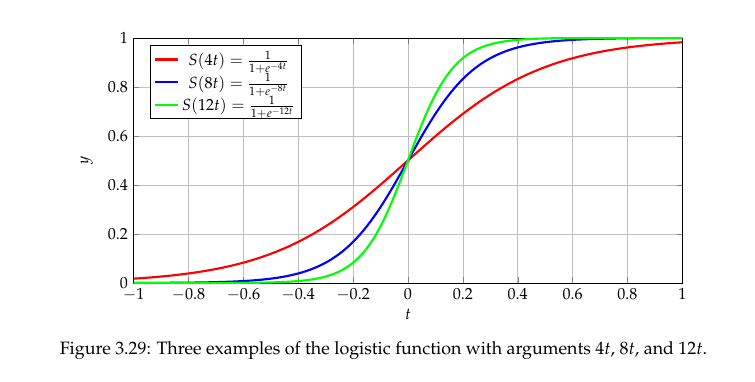

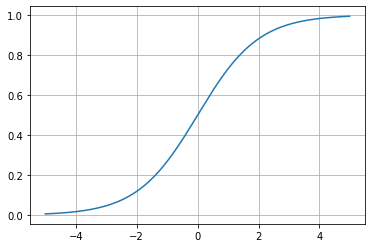

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def s(t):
    return 1/(1 + np.exp(-t))

x = np.arange(-5,5,0.01)
plt.grid(True)
plt.plot(x, s(x))



La derivada de la logistic function tiene propiedades interesantes.

\begin{eqnarray}
S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2} = \mathrm{e}^{-t} S^2(t)
\end{eqnarray}

ademas

\begin{eqnarray}
S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2} = \frac{1}{1 + \mathrm{e}^{-t}} \frac{\mathrm{e}^{-t}}{1 + \mathrm{e}^{-t}} = \frac{1}{1 + \mathrm{e}^{-t}} \left (  1 - \frac{1}{1 + \mathrm{e}^{-t}}
    \right ) = S(t) (1 - S(t))
\end{eqnarray}








Recuerde que podemos tener dos valores de $y$, $1$ o $0$. y que el sitema


$$ X \Theta = Y \quad , \quad X \in \mathbb{R}^{m \times n}, \quad , \quad \Theta \in \mathbb{R}^{n \times 1}, \quad , \quad Y \in \mathbb{R}^{m \times 1} $$

Construyamos ahora si la hipotesis: (continua y luego discreta).

$$ h(\Theta, x^{(i)}) = S(x^{(i)} \Theta) = \frac{1}{1 + \mathrm{e}^{- x^{(i)} \Theta}} $$

Pensamos entonces en

$$ h(\Theta, x^{(i)} ) = p( Y^{(i)} = 1 | x^{(i)}, \Theta )$$

La forma como modificamos la hipotesis para simular una variable dicotomica (1 o 0, verdadero o falso)
es definiendo un umbral. 
Dado un umbral $\gamma$ (por ejemplo $\gamma=1/2$, es

\begin{eqnarray} h_{binaria} (\Theta, x^{(i)}) = \left \{
    \begin{array}{cc}
    1  & \text{si } S( x^{(i)} \Theta) > \gamma \\
    0  & \text{de lo contrario} 
    \end{array}
    \right .
\end{eqnarray}

## Construccion de la funcion de costo.
Recuerde de la regresion lineal

$$ J(\theta) = \frac12 \| h(\theta, X) - Y \|^2 = \frac12 \sum_{i=1}^m [ h_i(\theta, X) - Y_i]^2  \quad (2) $$

El problema con esta funcion objetivo es que no es convexa.

Para verficar convexidad sacamos la segunda derivada y mostramos que es positiva.

Mostramos que la ecuacion (2) no es convexa.
Basta construir un ejemplo sensillo. Una sola muestra
$Y_i=1$. El argumento de $S$ es $1 + \theta$.







Tendriamos que para esta muestra

$$J(\theta)^{(i)} = \frac12 ( S( 1 + \theta) - 1)^2 $$

Vamos a probar que esta funcion no es convexa.

\begin{eqnarray}
\frac{d J(\theta)}{d \theta } &=& (S(1 + \theta) - 1)S^2(1 + \theta) \mathrm{e}^{-1 - \theta} = -\mathrm{e}^{-1 - \theta} S^2(1 + \theta) + S^3(1 + \theta) \mathrm{e}^{-1 - \theta}  \\
\frac{d^2 J(\theta)}{d^2 \theta} &=& \mathrm{e}^{-1 - \theta} S^2(1 + \theta) - 2 \mathrm{e}^{-2 - 2 \theta}  S^3(1 + \theta)  + 3 S^4(1 + \theta) \mathrm{e}^{-2 - 2 \theta} - S^3(1 + \theta) \mathrm{e}^{-1 - \theta} \\
&=& \mathrm{e}^{-1 - \theta} S^2(1 + \theta) [ 1 - 2 S(1 + \theta) \mathrm{e}^{-1 - \theta} + 3 S^2 \mathrm{e}^{-1-\theta} - S(1 + \theta) ]
\end{eqnarray}

8:15


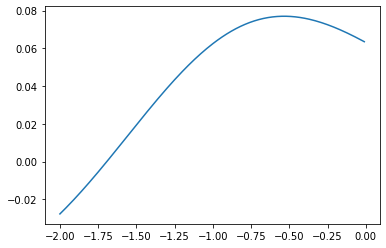

In [16]:
def f(t):
    return np.exp(-1-t)*(s(1+t))**2 *(   1 - 2*s(1+t)*np.exp(-1 -t) + 3*(s(1+t))**2*np.exp(-1-t)-s(1+t))

x = np.arange(-2,0,0.01)
plt.plot(x,f(x))

Recuerde la hipotesis (continua)
Pensemos que tenemos gatos , o perros

$$ h(\theta, x^{(i)}) = p(y_i =gato | x^{(i)}, \theta) = S(x^{(i)} \theta) = \frac{1}{1 + \mathrm{e}^{-x^{(i)} \theta}}$$

$$p(y_i= perro | x^{(i)}, \theta) = 1 - p(y_i = gato | x^{(i)}, \theta) $$

Ambas probabilidades (perro $y_i=0$, o gato, $y_i=1$) se pueden unir en una sola expresion.

$$p(y_i | x^{(i)}; \theta) = h(\theta, x^{(i)})^{y_i} (1 - h(\theta, x^{(i)})^{1 - y_i} $$

Ahora tenemos un conjunto the $x^{(i)}$ (filas de la matriz X)

Un $x^{(i)}$ representa perro o gato pero no una combinacion. 

Likelihood (verosimilitud) de todos los animales es
el product o de las probabilidades dado que todos los eventos son independientes.

$$\mathcal{L} ( \theta) = p(Y | X; \theta) = \prod_{i=1}^m h(\theta, x^{(i)} )^{y_i} (1 - h(\theta, x^{(i)})^{1 - y_i} $$

Queremos maximizar este "likelihood" . Buscar $\theta$ que maximise la verosimilitud.
Un problema es la productoria. Que es complicada.
Si tomamos el logaritmo, el minimo (maximo) no cambia. Una alternativa es sacar el log de $\mathcal{L}(\theta)$.

$$ \log \mathcal{L}(\theta ) = \sum_{i=1}^m y_i \log ( h(\theta, x^{(i)})  + (1 - y_i) \log(1 - h(\theta, x^{(i)})  $$

Cambiamos el signo para volverla de concava a convexa. Definimos entonces la funcion de costo

$$ J(\theta) = -\frac1m \sum_{i=1}^m y_i \log ( h(\theta, x^{(i)})  + (1 - y_i) \log(1 - h(\theta, x^{(i)})  $$



## Gradiente de la funcion de costo
Como el gradiente de la suma es la suma de los gradientes, tomemos solo un termino, le hallamos el gradiente y lo sumamos. Recuerde que 
$h(\theta, x^{(i)})= S(x^{(i)} \theta)= S$

$$ \frac{\partial y_i  \log[  h(\theta , x^{(i)})]}{\partial \theta_k } =y_i \frac{1}{S} S' x_{ik} = y_i \frac{1}{S} S(1-S) x_{ik} = y_i (1- S) x_{ik}$$


$$ \frac{\partial (1 - y_i) \log [ 1 - h(\theta, x^{(i)})] }{\partial \theta_k} = -(1 - y_i) \frac{1}{1 -S} S (1-S) x_{ik}  =  -(1 - y_i) S x_{ik} $$

\begin{eqnarray}
\frac{\partial y_i  \log[  h(\theta , x^{(i)})]}{\partial \theta_k } &+& \frac{\partial (1 - y_i) \log [ 1 - h(\theta, x^{(i)})] }{\partial \theta_k} =y_i (1- S) x_{ik} - (1 - y_i) S x_{ik} \\
&=& y_i x_{ik} - y_i S x_{ik} - S x_{ik} + y_i S x_{ik}  \\
&=& (y_i - S) x_{ik} \\
&=& -(h(x^{(i)}, \theta) - y_i) x_{ik}
\end{eqnarray}



$$ \frac{\partial J(\theta)}{\partial \theta_k} = \frac1m \sum_{i=1}^m ( h( x^{(i)}, \theta) - y_i) x_{ik}  $$


## Frontera de decision (decision boundary)
Recuerde la hipotesis (la continua)

$$h(\theta, x^{(i)}) = S(x^{(i)} \theta) = \frac{1}{1 + \mathrm{e}^{- x^{(i)} \theta}} $$

Hablemos de la hipotesis binaria. Dado un umbral (threshold) $\gamma$ definmos la hipotesis binaria
$\gamma=0.5$. 

\begin{eqnarray} h_{binaria} (\Theta, x^{(i)}) = \left \{
    \begin{array}{cc}
    1  & \text{si } S( x^{(i)} \Theta) > 0.5 \\
    0  & \text{de lo contrario} 
    \end{array}
    \right .
\end{eqnarray}


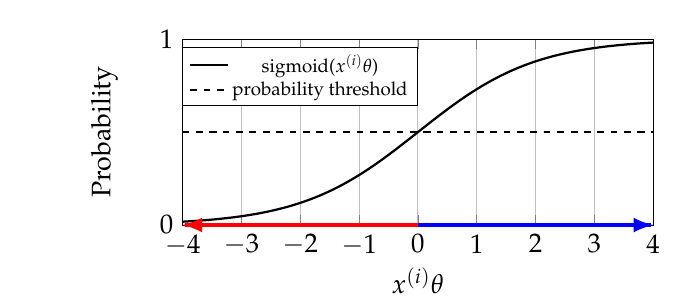

La frontera la define $\gamma=0.5$ que corresonde a
$x^T \theta = 0$.  Esto es, en 2D $\theta_0 + \theta_1 x_1 + \theta_2 x_2$ esto es una linea en las varibles $\theta_0, \theta_1$. 
El argumento de $S=S(x^{(i)} \theta)$ es decir
$x^{(i)}\theta = 0$ define un hiperplano que es la frontera de decision.

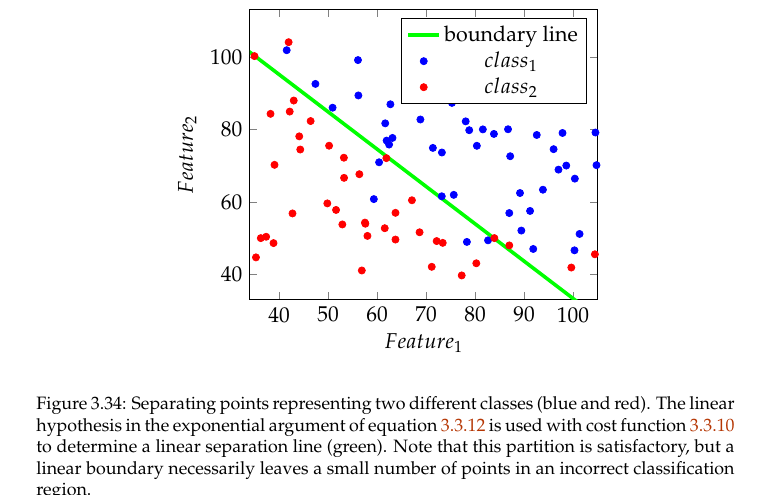





En vez de simplemente $X^T \theta$ (que es lineal)
$X=(1,x_1, x_2)$, $\theta=(\theta_0, \theta_1, \theta_2)$ , $\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$.

Si se queirer una frontera que no sea lineal se puede pensar en el polinomio.

$$g(\theta, X) = \sum_{i=0}^8 \sum_{j=0}^i \theta_{i(i+1)/2 + j } x_2^{j} x_1^{i-j} = 0 $$

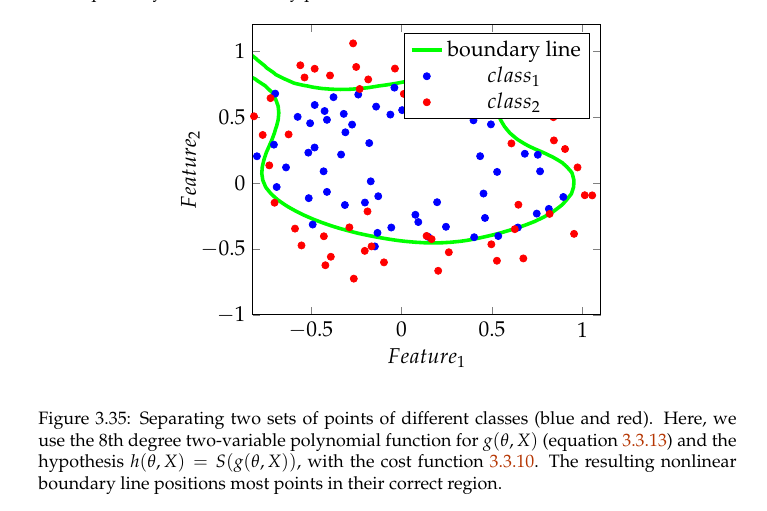

El cuello que se ve en la izquierda superior puede ser signo de "overfitting" podemos regularizar.

$$ J(\theta) = -\frac1m \sum_{i=1}^m y_i \log ( h(\theta, x^{(i)})  + (1 - y_i) \log(1 - h(\theta, x^{(i)})  + \frac{\lambda}{2 m} \| \theta \|^2 $$

Con $\lambda=1$ obtengo la grafica que sigue.


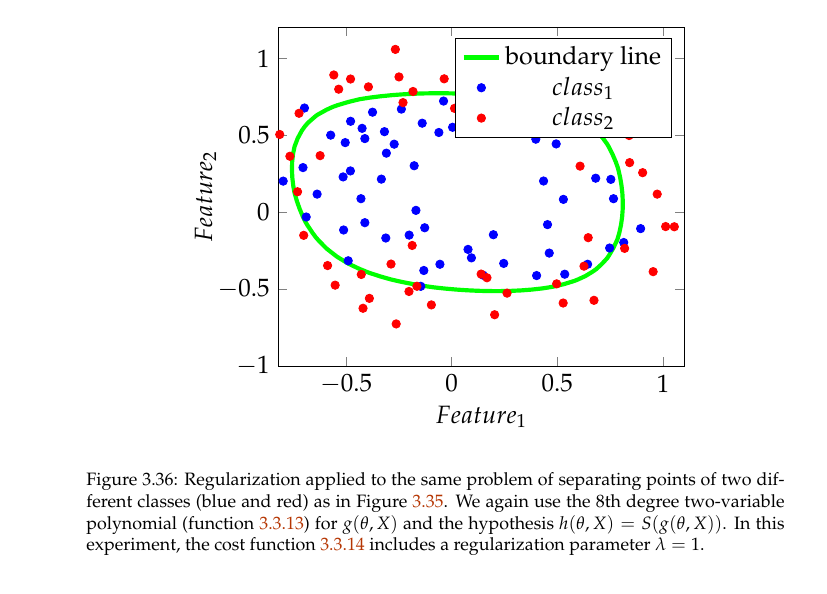

## Clasificacion multiclase.

Que pasa si en vez de perros y gatos, tenemos
perros, gatos, conejos y elefantes.

Mostramos 3 formas de atacar los problemas multi-clase ($K=3,4, ... $).

#### softmax regression: 
Es una generalizacion de la logistic. La idea
es la siguiente. Sea $K>2$, definimos la softmax funcion como

\begin{eqnarray}
\sigma : \mathbb{R}^K  &\to& [0,1]^K \\
(z_i) &\mapsto& = \frac{\exp(z_i)}{\sum_{j=1}^K \exp(z_j) } \quad, \quad i=1,2, \cdots, K, z_i \in \mathbb{R} 
\end{eqnarray}
En cierta forma $\sigma$ es una funcion de probabilidad.
Con este sigma (que es una generalizacion de la logistica y esto es un ejercicio al final del capitulo). El problema al final del capitulo es que
si $K=2$ $\sigma = S$.

Definmos la hipotesis:

\begin{eqnarray*}
    h(\theta,x) = \begin{pmatrix}
      P(y=1 | x ; \theta) \\
      P(y=2 | x ; \theta) \\
      \vdots \\
      P(y=K | x ; \theta) \\
    \end{pmatrix}
    = 
    \begin{pmatrix}
      \sigma(z_1) \\
      \sigma(z_2) \\
      \vdots \\
      \sigma(z_K) \\
    \end{pmatrix}
    =
    \frac{1}{\sum_{j=1}^K \mathrm{exp}({\theta^{(j)}}^T x)}
    \begin{pmatrix}
      \mathrm{exp}({\theta^{(1)}}^T x) \\
      \mathrm{exp}({\theta^{(2)}}^T x) \\
      \vdots \\
      \mathrm{exp}({\theta^{(K)}}^T x) \\
    \end{pmatrix} ,
  \end{eqnarray*}

Aca $z^{(i)} = {\theta^{(i)}}^T x$.






Debemos construir la funcion de costo.

Los pasos  (siguiendo los mismos para $K=2$

* escribir la probabilidad multivariada para cada muestra
* Escribir el likelihood (verosimilitud) como productoria a ser maximizada (esta productoria es doble, por que es sobre las muestras y sobre las clases)

* Tomo el logaritmo de esta productoria
* Cambie el signo .


 \begin{eqnarray}
    J(\theta) = - \left [
      \sum_{i=1}^m \sum_{k=1}^K \mathbb{1} \{  y^{(i)}  = k  \} \log
      \frac{\mathrm{exp} \left ({\theta^{(k)}}^T x \right )}
      {\sum_{j=1}^K  \mathrm{exp} \left ({\theta^{(j)}}^T x \right )}  
    \right ],
\end{eqnarray}

donde:

 \begin{eqnarray}
    \mathbb{1} \{ x \} =  \left \{
      \begin{array}{cc}
        1 & \text{ if } x \quad \text{is true}  \quad \quad \\
        0 & \text{ if } x \quad \text{is false} \quad  .
      \end{array}
    \right .  % } \, .
  \end{eqnarray}


Por ultimo necesita el gradiente de $J(\theta)$.






$$ \nabla_{\theta} J(\theta) = - \sum_{i=1}^m  \left [ x^{(i)} \left ( \mathbb{1} \{ y^{i}=k \} - p(y^{(i)} = k | x^{(i)}; \theta)  \right )   \right ]   $$


### one-hot encoding.

Es usar vectores base para las distintas categorias.

Por ejemplo

\begin{eqnarray}
y^{(i)} &=& (1, 0, 0)  \quad \text{gatos} \\
y^{(i)} &=& (0, 1, 0) \quad  \text{perros} \\
y^{(i)} &=& (0, 0, 1) \quad \text{cerdos} 
\end{eqnarray}
